# TCS Stock Prediction

Data  downloaded from- https://finance.yahoo.com/quote/TCS.NS/history?p=TCS.NS

## 1. Importing Librries

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import MinMaxScaler

## 2. Loading the Data

In [620]:
df= pd.read_csv('TCS.NS.csv')

## 3. Knowing and  Proceesing the Data

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5266 entries, 0 to 5265
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5266 non-null   object 
 1   Open       5257 non-null   float64
 2   High       5257 non-null   float64
 3   Low        5257 non-null   float64
 4   Close      5257 non-null   float64
 5   Adj Close  5257 non-null   float64
 6   Volume     5257 non-null   float64
dtypes: float64(6), object(1)
memory usage: 288.1+ KB


The Date Column's Data Type is object, so converting it in Date Format.

In [622]:
df['Date']=pd.to_datetime(df['Date'])

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5266 entries, 0 to 5265
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5266 non-null   datetime64[ns]
 1   Open       5257 non-null   float64       
 2   High       5257 non-null   float64       
 3   Low        5257 non-null   float64       
 4   Close      5257 non-null   float64       
 5   Adj Close  5257 non-null   float64       
 6   Volume     5257 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 288.1 KB


In [624]:
df=df.dropna()

### 3.1 - Description of Columns

Open - The Price of the Stock when the Market opens.

High - The Highest Price of the stock on given day.

Low - The Lowest Price of the stock on given day.

Close - The Price of Stock at the end of the day.

Adj Close (Adjusted Close) - Closing price after dividend payouts, stock splits, or the issue of additional shares have been taken into account.

Volume -  Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a trading day.

### 3.2 - Looking at  the values

In [625]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.201380,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.819551,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.901596,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.901596,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.839420,811856.0


In [626]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5261,2023-10-04,3486.300049,3548.000000,3477.300049,3537.750000,3537.750000,1788138.0
5262,2023-10-05,3554.000000,3624.000000,3551.199951,3589.350098,3589.350098,2990768.0
5263,2023-10-06,3591.000000,3634.949951,3575.050049,3621.399902,3621.399902,2075691.0
5264,2023-10-09,3645.050049,3679.000000,3631.000000,3638.350098,3638.350098,4233074.0
5265,2023-10-10,3640.050049,3648.000000,3601.350098,3628.899902,3628.899902,1848148.0


### 3.3 - Knowing the Statistics of the Data

In [627]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5257,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5.257000e+03
mean,2013-02-17 13:11:21.377211136,1134.091934,1145.835323,1121.434718,1133.569987,1021.918462,3.217035e+06
min,2002-08-12 00:00:00,32.474998,36.450001,32.474998,35.474998,25.200102,0.000000e+00
25%,2007-10-12 00:00:00,235.000000,239.375000,229.375000,234.274994,170.507736,1.652378e+06
50%,2013-02-12 00:00:00,698.474976,711.974976,690.525024,702.250000,564.400574,2.526082e+06
75%,2018-06-14 00:00:00,1754.900024,1780.000000,1731.199951,1750.300049,1579.596924,3.979590e+06
max,2023-10-10 00:00:00,4033.949951,4043.000000,3980.000000,4019.149902,3847.100098,8.806715e+07
std,NaN,1087.747242,1097.077638,1077.474314,1087.329853,1060.931465,3.158829e+06


## 4. Visualization

### 4.1 Lineplot of the Close Price of Tata Consultancy Services

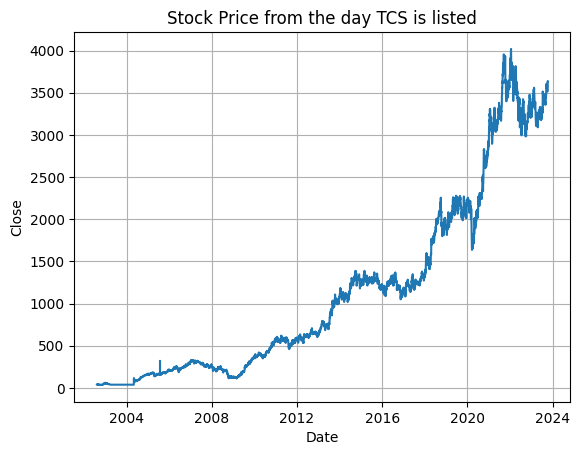

In [628]:
a=sns.lineplot(x=df.Date,y=df.Close)
plt.title("Stock Price from the day TCS is listed")
plt.grid()
plt.show()

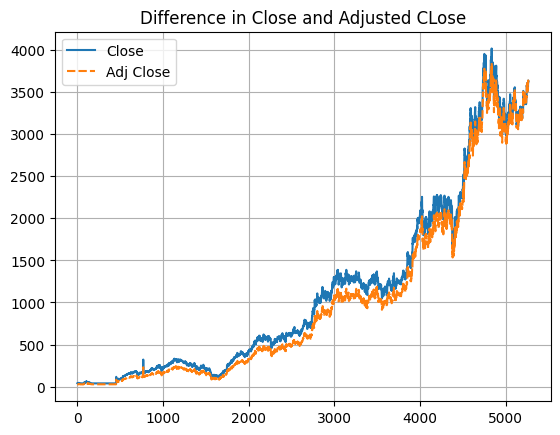

In [629]:
a=sns.lineplot(data=df[['Close','Adj Close']])
plt.title("Difference in Close and Adjusted CLose")
plt.grid()
plt.show()

### 4.3 Barplot of the Close Price of Tata Consultancy Services

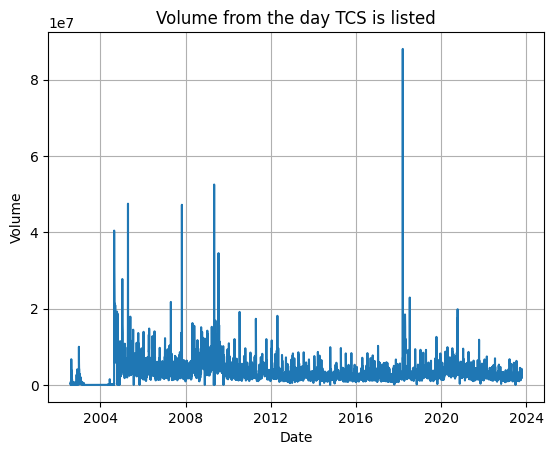

In [630]:
b=sns.lineplot(x=df.Date,y=df.Volume)
plt.title("Volume from the day TCS is listed")
plt.grid()
plt.show()

### 4.4 Lineplot of the Close Price of Tata Consultancy Services in the past 30 days

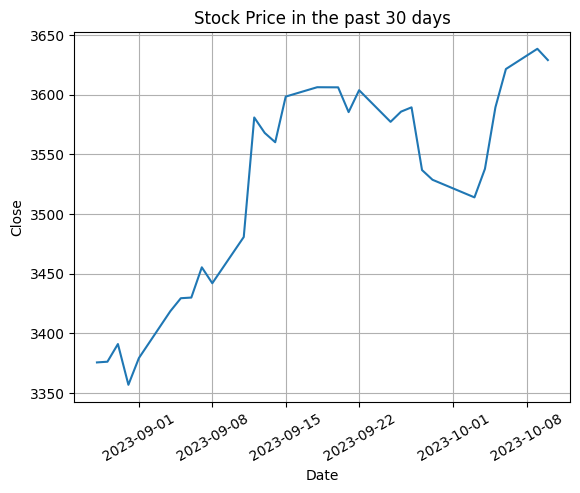

In [631]:
df30d=df.tail(30)
c=sns.lineplot(x=df30d['Date'],y=df30d.Close)
plt.xticks(rotation=30)
plt.title("Stock Price in the past 30 days")
plt.grid()
plt.show()

In [632]:
df30d

,Date,Open,High,Low,Close,Adj Close,Volume
5236,2023-08-28,3394.000000,3394.000000,3360.100098,3375.550049,3375.550049,1037485.0
5237,2023-08-29,3381.050049,3389.550049,3365.000000,3376.149902,3376.149902,944517.0
5238,2023-08-30,3398.000000,3408.100098,3383.050049,3390.949951,3390.949951,1188200.0
5239,2023-08-31,3401.000000,3417.399902,3343.649902,3356.800049,3356.800049,3417652.0
5240,2023-09-01,3366.000000,3389.000000,3356.800049,3379.199951,3379.199951,1277950.0
5241,2023-09-04,3378.000000,3432.850098,3370.050049,3418.500000,3418.500000,1828332.0
5242,2023-09-05,3420.000000,3447.000000,3405.149902,3429.350098,3429.350098,1501842.0
5243,2023-09-06,3434.000000,3443.899902,3398.100098,3429.899902,3429.899902,1314818.0
5244,2023-09-07,3430.800049,3460.000000,3422.300049,3455.250000,3455.250000,1885092.0
5245,2023-09-08,3455.250000,3465.000000,3435.050049,3441.899902,3441.899902,1518917.0


## 5. Preparation for Prediction Model

### 5.1 - Importing Libraries

In [633]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout,Bidirectional
from tensorflow.keras.layers import Flatten
from keras.optimizers import Adam

### 5.2 - Preparing Data for LSTM

In [634]:
df1=df.reset_index()['Close']

In [635]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [636]:
timeseries_data = df.Close[-400:].values
n_steps = 19
X, y = prepare_data(timeseries_data, n_steps)

### 5.3 -  Reshaping Processed Data for LSTM

In [637]:
n_features = 1
X=X.reshape((X.shape[0],X.shape[1], n_features))

### 5.4 Creating and Training LSTM Model on processed data

In [650]:
model = Sequential()
model.add(LSTM(128, activation='relu',return_sequences=True, input_shape=(n_steps, n_features)))
##model.add(Dropout(0.1))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32,activation="relu"))
##model.add(Dropout(0.1))
##model.add(LSTM(64))
model.add(Dense(1))
opt= Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,amsgrad=False,epsilon=0.00000008)
model.compile(optimizer=opt, loss='mse')
model.fit(X[0:300],y[0:300],validation_data=(X[300:],y[300:]),epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 4s 83ms/step - loss: 8821385.0000 - val_loss: 224096400.0000
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 32074700.0000 - val_loss: 194776.3281
Epoch 3/100
10/10 [==============================] - 0s 27ms/step - loss: 3027580.5000 - val_loss: 2272617.0000
Epoch 4/100
10/10 [==============================] - 0s 26ms/step - loss: 1383097.0000 - val_loss: 10805166.0000
Epoch 5/100
10/10 [==============================] - 0s 26ms/step - loss: 3000473.5000 - val_loss: 710833.7500
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 858807.0625 - val_loss: 2194367.5000
Epoch 7/100
10/10 [==============================] - 0s 26ms/step - loss: 3689685.7500 - val_loss: 581287.5625
Epoch 8/100
10/10 [==============================] - 0s 31ms/step - loss: 6294235.0000 - val_loss: 713412.6250
Epoch 9/100
10/10 [==============================] - 0s 26ms/step - loss: 17514348.0000 - val_loss: 14788

## 6. Predicting future Close Values of the stock using the model

In [651]:
x_input = np.array(df.Close[-19:])

temp_input=list(x_input)


output=[]
i=0
while(i<30):
    if(len(temp_input)>19):
        
        x_input=np.array(temp_input[1:])
        ##print("Input for Day {}  : {}".format(i,x_input))
        
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        ##yhatin=scalar.inverse_transform(yhat)
        print("Output for Day {} : {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        
        output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        output.append(yhat[0][0])
        i=i+1
    
print('Forecast for 30 Days',output)

Output for Day 1 : [[3620.9333]]
Output for Day 2 : [[3627.0298]]
Output for Day 3 : [[3648.1382]]
Output for Day 4 : [[3648.5488]]
Output for Day 5 : [[3644.311]]
Output for Day 6 : [[3632.6594]]
Output for Day 7 : [[3633.9082]]
Output for Day 8 : [[3623.4517]]
Output for Day 9 : [[3622.9946]]
Output for Day 10 : [[3613.7268]]
Output for Day 11 : [[3586.418]]
Output for Day 12 : [[3583.4385]]
Output for Day 13 : [[3590.046]]
Output for Day 14 : [[3619.5737]]
Output for Day 15 : [[3656.1733]]
Output for Day 16 : [[3676.0566]]
Output for Day 17 : [[3682.2332]]
Output for Day 18 : [[3676.247]]
Output for Day 19 : [[3673.3018]]
Output for Day 20 : [[3676.2324]]
Output for Day 21 : [[3684.0554]]
Output for Day 22 : [[3693.7395]]
Output for Day 23 : [[3690.412]]
Output for Day 24 : [[3684.1155]]
Output for Day 25 : [[3675.7]]
Output for Day 26 : [[3672.871]]
Output for Day 27 : [[3667.318]]
Output for Day 28 : [[3663.1506]]
Output for Day 29 : [[3653.942]]
Forecast for 30 Days [3623.6365, 3

## 7. Visualizing predicted data

In [652]:
days=np.arange(0,200)
day_pred=np.arange(200,230)

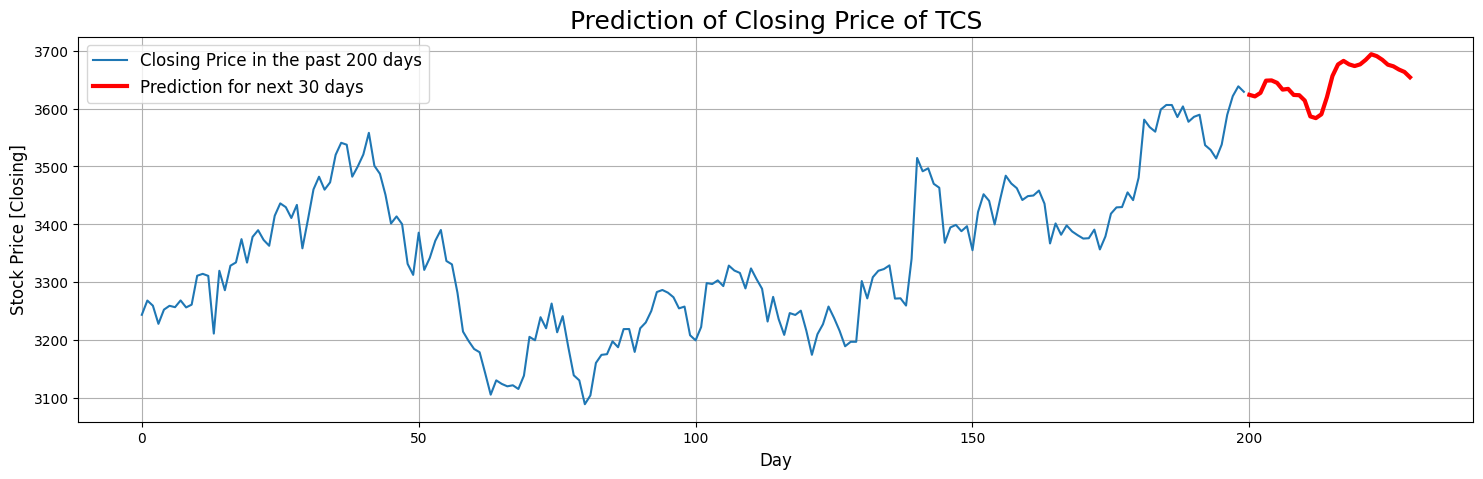

In [653]:
plt.figure(figsize=(18,5))
plt.plot(days,df.Close.tail(200), label = 'Closing Price in the past 200 days')
plt.plot(day_pred,output, color = 'red', label = 'Prediction for next 30 days', lw = 3)
plt.legend(fontsize = 12)
plt.title('Prediction of Closing Price of TCS', fontsize = 18)
plt.xlabel('Day' ,fontsize = 12)
plt.ylabel('Stock Price [Closing]' ,fontsize = 12)
plt.grid()
plt.show()